In [977]:
# In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to
# develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.


# New York City TLC stakeholders have been impressed with the data analytical work completed by the Automatidata team in this project. 
# As a result, they have reached out once again for assistance in creating a machine learning model that can help predict whether or not a 
# rider will be a generous tipper.

In [978]:
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as ply
import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# This is the classifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
import pickle

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [979]:
Data = r'C:\Users\alikr\OneDrive\Desktop\Google certificate\Google advanced analytics\M1 Project\Automatidata project\2017_Yellow_Taxi_Trip_Data.csv'
df = pd.read_csv(Data)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,3/25/2017 8:55,3/25/2017 9:09,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,4/11/2017 14:53,4/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26,12/15/2017 7:34,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,5/7/2017 13:17,5/7/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,4/15/2017 23:32,4/15/2017 23:49,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [980]:
df.shape

(22699, 18)

In [981]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [983]:
## NA check
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [984]:
## tranfor dates to the correct type
df["tpep_pickup_datetime"] = pd.to_datetime(df['tpep_pickup_datetime'])
df["tpep_dropoff_datetime"] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [985]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

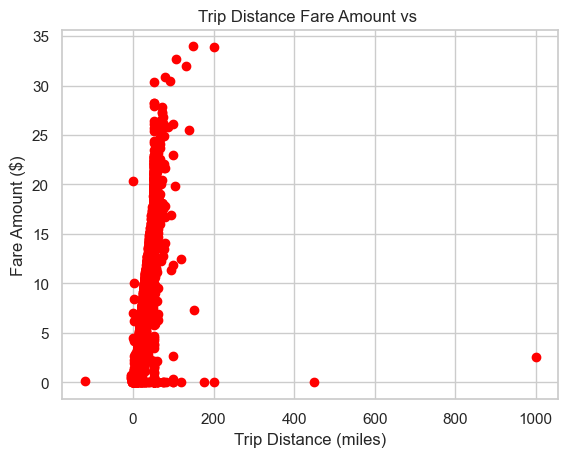

In [986]:
plot = ply.scatter(df['fare_amount'],df['trip_distance'], color = 'red')

# Add title and axis labels
ply.title('Trip Distance Fare Amount vs ')
ply.xlabel('Trip Distance (miles)')
ply.ylabel('Fare Amount ($)')

ply.show()

## noticed that we have -ve in hte trip distance we need to look deeper

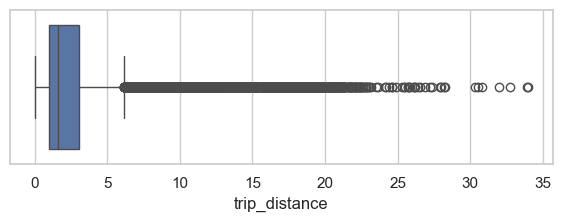

In [987]:
ply.figure(figsize=(7,2))
boxp1 = sns.boxplot(data = None, x=df['trip_distance'] )

## the majority of the trips are below 2 miles.

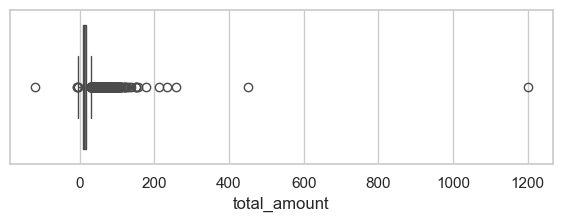

In [988]:
ply.figure(figsize=(7,2))
boxp2 = sns.boxplot(data = None ,x = df['total_amount'])

## the majority of the trips are between 10-16$ .

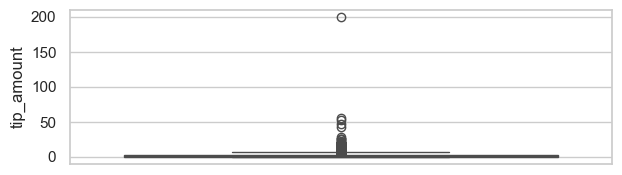

In [989]:
ply.figure(figsize=(7,2))
boxp3 = sns.boxplot(data = df['tip_amount'])
## the majority of the trips are between 2$ .

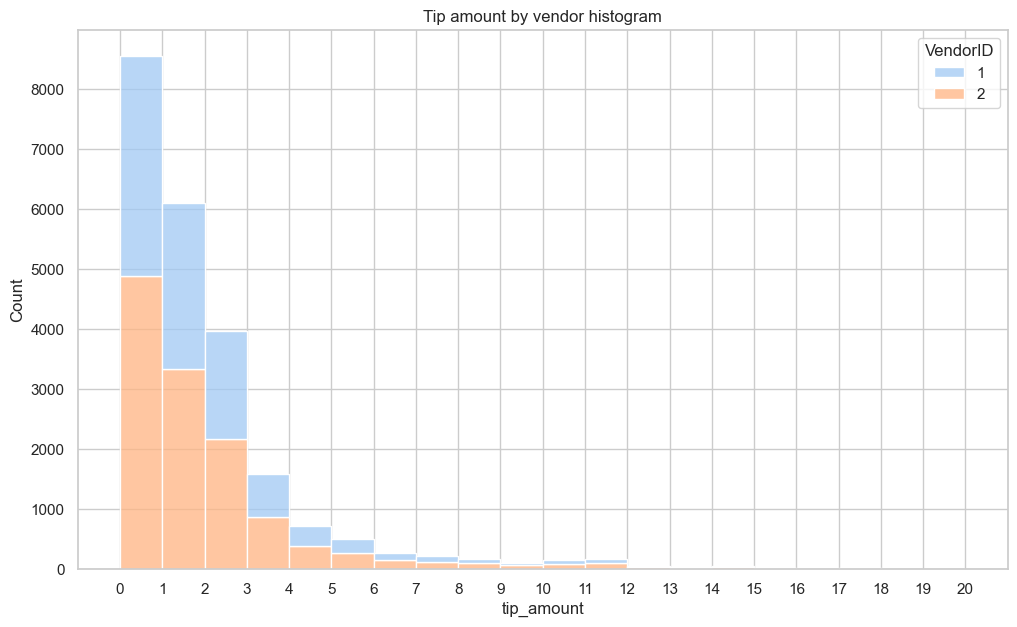

In [990]:
ply.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
ply.title('Tip amount by vendor histogram');

##  Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between 
#the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained 
#for all tip amounts.Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

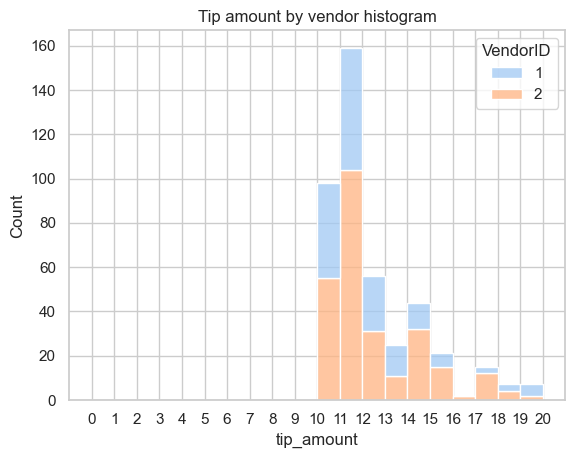

In [991]:
# people that tiped more than 10$

df_tip10plus = df[df['tip_amount'] > 10]

ax = sns.histplot(data=df_tip10plus, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
ply.title('Tip amount by vendor histogram');

In [992]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [993]:
mean_pass_count = df.groupby('passenger_count')['tip_amount'].mean()
df1 = pd.DataFrame(mean_pass_count)

mean_pass_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

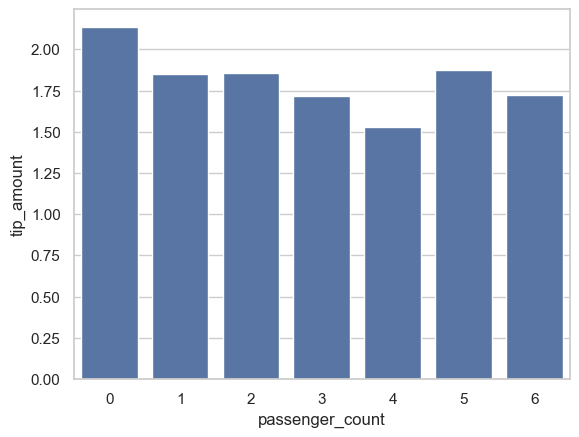

In [994]:
boxp1 = sns.barplot(x = df1.index, y = 'tip_amount', data = df1)

In [995]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%m/%d/%Y %H:%M")
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format="%m/%d/%Y %H:%M")
df['month'] = df['tpep_pickup_datetime'].dt.month.astype('int64')

In [996]:
df['day'] = df['tpep_pickup_datetime'].dt.day.astype('int64')

In [997]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [998]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15


In [999]:
total_ride_per_month = df['month'].value_counts()
total_ride_per_month

month_order = [1,2,3,4,5,6,7,8,9,10,11,12]

total_ride_per_month = total_ride_per_month.reindex(index=month_order)
total_ride_per_month

month
1     1997
2     1769
3     2049
4     2019
5     2013
6     1964
7     1697
8     1724
9     1734
10    2027
11    1843
12    1863
Name: count, dtype: int64

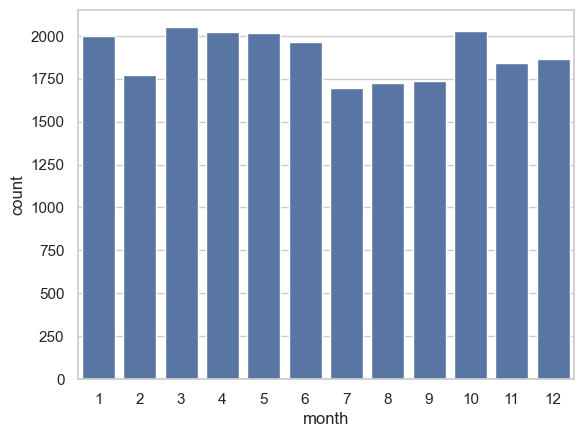

In [1000]:
df3 = pd.DataFrame(total_ride_per_month)
boxp3 = sns.barplot(x = total_ride_per_month.index, y = total_ride_per_month)

In [1001]:
total_ride_per_day = df.groupby('day')['passenger_count'].sum()
total_ride_per_day

day
1     1237
2     1136
3     1349
4     1158
5     1255
6     1096
7     1298
8     1180
9     1179
10    1301
11    1285
12    1316
13    1277
14    1256
15    1268
16    1310
17    1285
18    1306
19    1283
20    1090
21    1351
22    1237
23    1085
24    1170
25    1257
26    1138
27    1175
28    1255
29    1024
30    1091
31     631
Name: passenger_count, dtype: int64

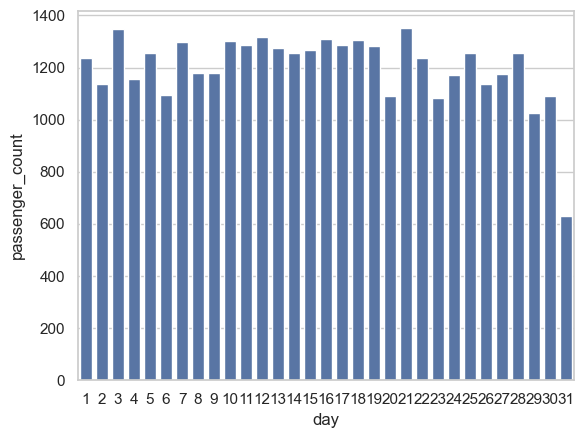

In [1002]:
df4 = pd.DataFrame(total_ride_per_day)
boxp = sns.barplot(x = df4.index, y = 'passenger_count', data = df4)

In [1003]:
total_rev_per_month = df.groupby('month')['total_amount'].sum()
total_rev_per_month

month
1     31735.25
2     28937.89
3     33085.89
4     32012.54
5     33828.58
6     32920.52
7     26617.64
8     27759.56
9     28206.38
10    33065.83
11    30800.44
12    31261.57
Name: total_amount, dtype: float64

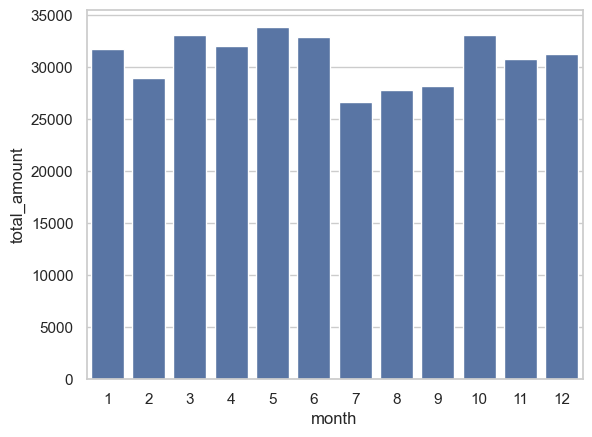

In [1004]:
df5 = pd.DataFrame(total_rev_per_month)
boxp4 = sns.barplot(x = df5.index, y = 'total_amount', data = df5)

## Monthly revenue generally follows the pattern of monthly rides, with noticeable dips 
##in the summer months of July, August, and September, and also one in February.

In [1005]:
unique_count = df['DOLocationID'].nunique()

unique_count

216

In [1006]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean()


distance_by_dropoff = distance_by_dropoff.sort_values()

distance_by_dropoff

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

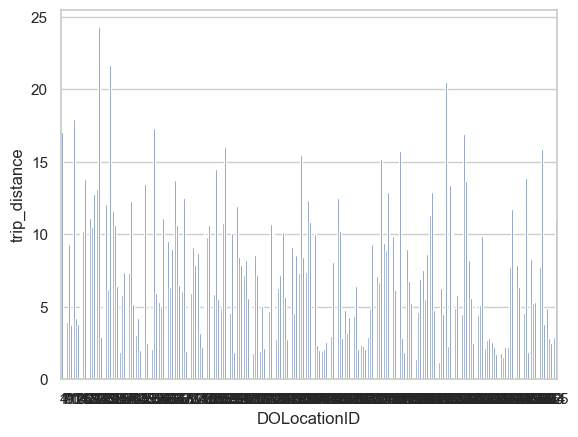

In [1007]:
df6 = pd.DataFrame(distance_by_dropoff)

boxp7 = sns.barplot(x = df6.index, y = 'trip_distance', data = df6)

In [1008]:
#Conculsion:
## the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.
##There are several trips that have a trip distance of "0.0." 

##that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. 
##This would likely be something that will help the client with their model.

In [1009]:
df['trip_duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [1010]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00


In [1011]:
# changing from cat to int payment var.

# 1= Credit card 

# 2= Cash 

# 3= No charge 

# 4= Dispute 

# 5= Unknown 

# 6= Voided trip

In [1012]:
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['Type'] = df['payment_type'].map(payment_mapping)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00,Credit Card
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00,Credit Card
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00,Credit Card
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00,Credit Card
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00,Cash


In [1013]:
AVG_Fair_Amount = df['fare_amount'].groupby(df['Type']).mean()
AVG_Fair_Amount

Type
Cash           12.213546
Credit Card    13.429748
Dispute         9.913043
No Charge      12.186116
Name: fare_amount, dtype: float64

In [1014]:
## it turn out that the people with Credit card as type tend to pay a larger amount. the diffrence might be from random 
## sampling. To asses this we need to do a A/B test

# 𝐻0
#  : There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

# 𝐻𝐴
#  : There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [1015]:
## Sig level = 5%

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']

In [1016]:
stats.ttest_ind(a=credit_card, b= cash , equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

In [1017]:
# SINCE THE P VALUE < SIG LEVEL THEREFORE we reject the the null hypothesis there is statistical significande in the average fair amount 
# CC and Cash users.

In [1018]:
## Now it’s time to work on predicting the taxi fare amounts MLP

In [1019]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699
mean,5.675849e+07,1.556236,2017-06-29 07:32:19.607912192,2017-06-29 07:49:20.131283456,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,6.422442,15.597383,0 days 00:17:00.523371073
min,1.212700e+04,1.000000,2017-01-01 00:08:00,2017-01-01 00:17:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,1.000000,1.000000,-1 days +23:43:00
25%,2.852056e+07,1.000000,2017-03-30 03:09:00,2017-03-30 03:11:00,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,3.000000,8.000000,0 days 00:07:00
50%,5.673150e+07,2.000000,2017-06-23 12:35:00,2017-06-23 12:55:00,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,6.000000,16.000000,0 days 00:11:00
75%,8.537452e+07,2.000000,2017-10-02 10:34:00,2017-10-02 10:53:00,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000,23.000000,0 days 00:18:00
max,1.134863e+08,2.000000,2017-12-31 23:45:00,2017-12-31 23:49:00,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,12.000000,31.000000,1 days 00:00:00
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3.464777,8.718297,0 days 01:01:59.793601346


In [1020]:
df["tpep_pickup_datetime"] = pd.to_datetime(df['tpep_pickup_datetime'])
df["tpep_dropoff_datetime"] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

In [1022]:
## based on the info above we can consider trip_distance, fare_amount, duration and will use them in the regression model
## we need tio check for outliers first

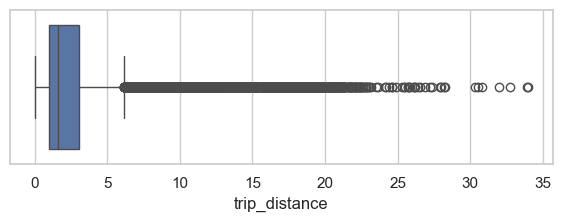

In [1023]:
## checking for outliers using boxplots
ply.figure(figsize=(7,2))
boxp1 = sns.boxplot(data = None, x=df['trip_distance'] )

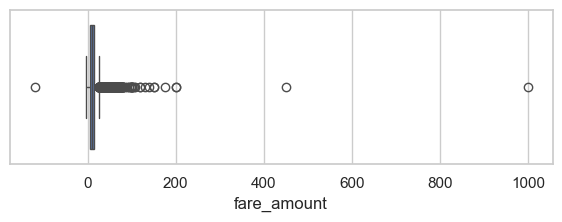

In [1024]:
ply.figure(figsize=(7,2))
boxp1 = sns.boxplot(data = None, x=df['fare_amount'] )

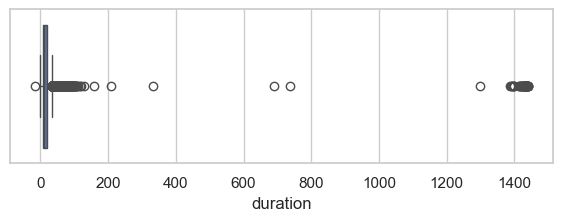

In [1025]:
ply.figure(figsize=(7,2))
boxp1 = sns.boxplot(data = None, x=df['duration'] )

In [1026]:
## from the boxplots we can conclude that all has outlier but trip_dusance has the most outliers. 
## they dont look unbelievable, for the outlier it may be people leaving nyc. 
## for fare amount and duration they dont make sense you cant have fare amout in -ve. same thing with duration.

In [1027]:
## we need to chjeck it the 0 are actual 0 are they rounded to 0 in the column Trip_distance
df['trip_distance'].sort_values().head(100)
## we can deduce that the distance are actually 0, they are not rounded. It might be correct that the cusotmer ordered the taxi and then cancelled it.

22026    0.0
795      0.0
6908     0.0
13561    0.0
12238    0.0
        ... 
8353     0.0
20844    0.0
2604     0.0
8839     0.0
17654    0.0
Name: trip_distance, Length: 100, dtype: float64

In [1028]:
# finding the number of 0 distance rides
(df['trip_distance'] == 0).sum()

148

In [1029]:
## Fair Amount Outliers
df['fare_amount'].sort_values().head(15)

12944   -120.0
11204     -4.5
20698     -4.5
14714     -4.0
17602     -4.0
5448      -3.5
20317     -3.5
8204      -3.5
18565     -3.0
4423      -3.0
10281     -2.5
1646      -2.5
5758      -2.5
314       -2.5
5722       0.0
Name: fare_amount, dtype: float64

In [1030]:
## we have 14 customers that has -ve fare amount
(df['fare_amount'] < 0).sum()

14

In [1031]:
# since -ve dosent make sense changeit to a 0
df['fare_amount'] = df['fare_amount'].apply(lambda x:0 if x<0 else x)
(df['fare_amount'] < 0).sum()

0

In [1032]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:19.607912192,2017-06-29 07:49:20.131283456,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.033832,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,6.422442,15.597383,0 days 00:17:00.523371073,17.008723
min,1.212700e+04,1.000000,2017-01-01 00:08:00,2017-01-01 00:17:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,1.000000,1.000000,-1 days +23:43:00,-17.000000
25%,2.852056e+07,1.000000,2017-03-30 03:09:00,2017-03-30 03:11:00,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,3.000000,8.000000,0 days 00:07:00,7.000000
50%,5.673150e+07,2.000000,2017-06-23 12:35:00,2017-06-23 12:55:00,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,6.000000,16.000000,0 days 00:11:00,11.000000
75%,8.537452e+07,2.000000,2017-10-02 10:34:00,2017-10-02 10:53:00,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000,23.000000,0 days 00:18:00,18.000000
max,1.134863e+08,2.000000,2017-12-31 23:45:00,2017-12-31 23:49:00,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,12.000000,31.000000,1 days 00:00:00,1440.000000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.212462,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3.464777,8.718297,0 days 01:01:59.793601346,61.996560


In [1033]:
df['duration'].describe()

count    22699.000000
mean        17.008723
std         61.996560
min        -17.000000
25%          7.000000
50%         11.000000
75%         18.000000
max       1440.000000
Name: duration, dtype: float64

In [1034]:
df['duration'] = df['duration'].apply(lambda x:0 if x<0 else x)

In [1035]:
# When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. 
# However, you can use the statistics of trips you do know to generalize about ones you do not know.
# create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.?
    
df['pickoff_dropoff'] = df['PULocationID'].astype(str) + df['DOLocationID'].astype(str)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00,Credit Card,14.0,100231
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00,Credit Card,26.0,18643
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00,Credit Card,8.0,262236
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00,Credit Card,31.0,18897
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00,Cash,17.0,4112


In [1036]:
grouped = df.groupby('pickoff_dropoff')['trip_distance'].mean()

grouped.head()

pickoff_dropoff
1001      16.890000
100100     0.253333
100107     1.180000
100113     2.024000
100114     1.940000
Name: trip_distance, dtype: float64

In [1037]:
## Gropuped all that has the same pickoff_dropoff and founf their mean disrance and mean duration

grouped_dict = {'trip_distance': grouped.to_dict()}
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1001': 16.89,
 '100100': 0.25333333333333335,
 '100107': 1.18,
 '100113': 2.024,
 '100114': 1.94,
 '10012': 4.55,
 '100125': 2.84,
 '10013': 4.201666666666667,
 '100132': 17.2175,
 '100137': 1.299,
 '100138': 10.432857142857143,
 '100140': 2.746,
 '100141': 2.11,
 '100142': 1.6958333333333335,
 '100143': 1.5825,
 '100144': 3.0066666666666664,
 '100148': 4.1066666666666665,
 '100151': 3.668,
 '100152': 4.9,
 '100158': 1.938,
 '100161': 0.9813888888888889,
 '100162': 1.2163636363636363,
 '100163': 1.2656,
 '100164': 0.841,
 '100166': 5.199999999999999,
 '100170': 0.8548,
 '100177': 12.0,
 '100181': 9.34,
 '100186': 0.6404761904761904,
 '100193': 4.39,
 '100198': 9.01,
 '100202': 5.3,
 '100209': 4.43,
 '100211': 2.48,
 '100224': 1.9500000000000002,
 '100225': 7.5,
 '100229': 1.7850000000000001,
 '100230': 0.72975,
 '100231': 3.5216666666666665,
 '100232': 3.8449999999999998,
 '100233': 1.2458333333333333,
 '100234': 1.2545454545454546,
 '100236': 3.3375,
 '100237': 2.5566666666666666,
 

In [1038]:
df['mean_distance'] = df['pickoff_dropoff']
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00,Credit Card,14.0,100231,3.521667
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00,Credit Card,26.0,18643,3.108889
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00,Credit Card,8.0,262236,0.881429
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00,Credit Card,31.0,18897,3.700000
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00,Cash,17.0,4112,4.435000


In [1039]:
## we apply the same process to duration

grouped_duration = df.groupby('pickoff_dropoff')['duration'].mean()
grouped_dict_duration = {'duration': grouped_duration.to_dict()}


grouped_dict_duration = grouped_dict_duration['duration']
df['mean_duration'] = df['pickoff_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict_duration)

In [1040]:
# change the formart to datatime and int
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%m/%d/%Y %H:%M")
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format="%m/%d/%Y %H:%M")
df['month'] = df['tpep_pickup_datetime'].dt.month.astype('int64')
df['day'] = df['tpep_pickup_datetime'].dt.day.astype('int64')

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00,Credit Card,14.0,100231,3.521667,23.000000
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00,Credit Card,26.0,18643,3.108889,24.333333
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00,Credit Card,8.0,262236,0.881429,7.257143
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00,Credit Card,31.0,18897,3.700000,31.000000
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00,Cash,17.0,4112,4.435000,14.500000


In [1041]:
df['duration'] = pd.to_timedelta(df['duration'])
#df['mean_duration'] = df['duration'].dt.total_seconds() / 60

In [1042]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:00,2017-03-25 09:09:00,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,25,0 days 00:14:00,Credit Card,0 days 00:00:00.000000014,100231,3.521667,23.000000
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,11,0 days 00:26:00,Credit Card,0 days 00:00:00.000000026,18643,3.108889,24.333333
2,106203690,1,2017-12-15 07:26:00,2017-12-15 07:34:00,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,15,0 days 00:08:00,Credit Card,0 days 00:00:00.000000008,262236,0.881429,7.257143
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,7,0 days 00:31:00,Credit Card,0 days 00:00:00.000000031,18897,3.700000,31.000000
4,30841670,2,2017-04-15 23:32:00,2017-04-15 23:49:00,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,15,0 days 00:17:00,Cash,0 days 00:00:00.000000017,4112,4.435000,14.500000


In [1043]:
# Define rush hour as:
# Any weekday (not Saturday or Sunday) AND
# Either from 06:00–10:00 or from 16:00–20:00

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract weekday (0=Monday, 6=Sunday) and hour
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Create rush_hour column
df['rush_hour'] = ((df['weekday'] < 5) &               # Weekday: Monday (0) to Friday (4)
                   ((df['hour'].between(6, 9)) |       # Morning rush: 6am to 9:59am
                    (df['hour'].between(16, 19)))      # Evening rush: 4pm to 7:59pm
                  ).astype(int)


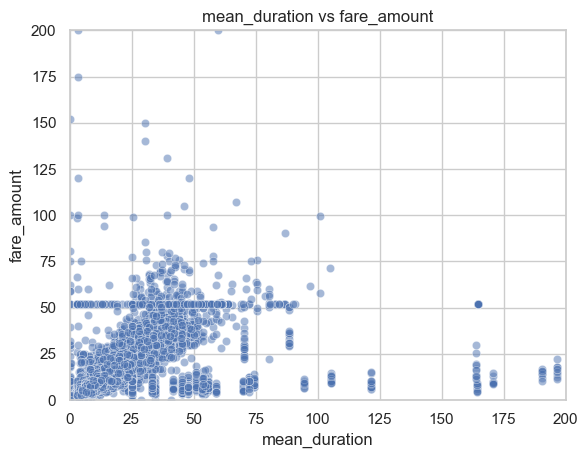

In [1044]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.scatterplot(data=df, x='mean_duration', y='fare_amount', alpha=0.5)
plt.title('mean_duration vs fare_amount')
plt.xlabel('mean_duration')
plt.ylabel('fare_amount')
plt.xlim(0, 200) 
plt.ylim(0, 200)
plt.show()

In [1045]:
## we notuice as st line at 52 dollars one thing can say that there was a promoition, we notice that we have 514 rides fares was
## 52$
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: count, dtype: int64

In [1046]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration,weekday,hour,rush_hour
11,18600059,2,2017-03-05 19:15:00,2017-03-05 19:52:00,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,3,5,0 days 00:37:00,Credit Card,0 days 00:00:00.000000037,236132,19.211667,265.166667,6,19,0
110,47959795,1,2017-06-03 14:24:00,2017-06-03 15:31:00,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,6,3,0 days 01:07:00,Credit Card,0 days 00:00:00.000000067,132163,19.229000,53.000000,5,14,0
161,95729204,2,2017-11-11 20:16:00,2017-11-11 20:17:00,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,11,11,0 days 00:01:00,Cash,0 days 00:00:00.000000001,132132,2.255862,3.068966,5,20,0
247,103404868,2,2017-12-06 23:37:00,2017-12-07 00:06:00,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,12,6,0 days 00:29:00,Cash,0 days 00:00:00.000000029,13279,19.431667,47.000000,2,23,0
379,80479432,2,2017-09-24 23:45:00,2017-09-25 00:15:00,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,9,24,0 days 00:30:00,Credit Card,0 days 00:00:00.000000030,132234,17.654000,49.600000,6,23,0
388,16226157,1,2017-02-28 18:30:00,2017-02-28 19:09:00,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,2,28,0 days 00:39:00,Cash,0 days 00:00:00.000000039,13248,18.761905,61.619048,1,18,1
406,55253442,2,2017-06-05 12:51:00,2017-06-05 13:07:00,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,6,5,0 days 00:16:00,Cash,0 days 00:00:00.000000016,22888,4.730000,16.000000,0,12,0
449,65900029,2,2017-08-03 22:47:00,2017-08-03 23:32:00,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,8,3,0 days 00:45:00,Cash,0 days 00:00:00.000000045,13248,18.761905,61.619048,3,22,0
468,80904240,2,2017-09-26 13:48:00,2017-09-26 14:31:00,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,9,26,0 days 00:43:00,Cash,0 days 00:00:00.000000043,186132,17.096000,42.800000,1,13,0
520,33706214,2,2017-04-23 21:34:00,2017-04-23 22:46:00,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,4,23,0 days 01:12:00,Credit Card,0 days 00:00:00.000000072,132148,17.994286,46.571429,6,21,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


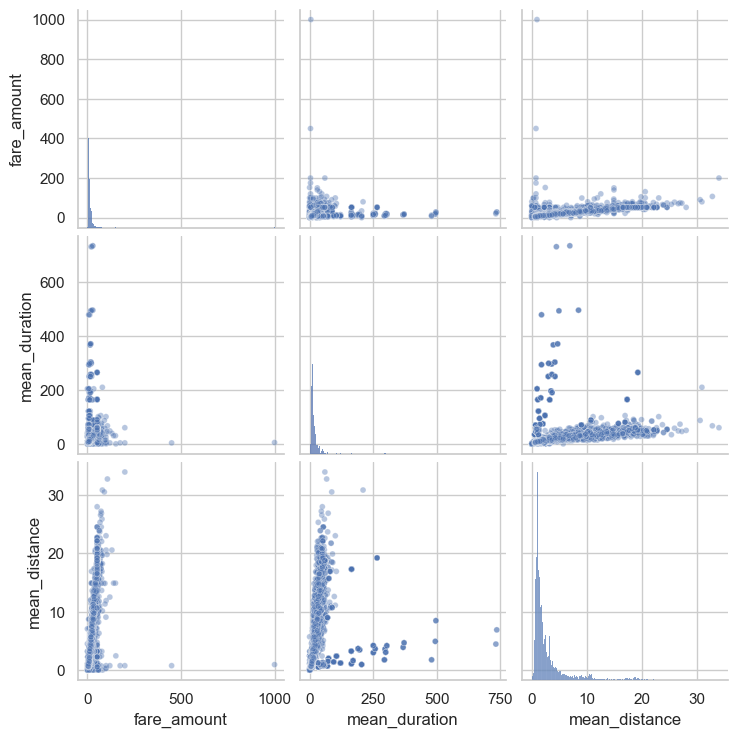

In [1047]:
## OLS MODEL

df2 = df.copy()

# drop the vriables that we dont need in our analysis
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickoff_dropoff', 'day', 'month','hour','weekday','trip_distance','trip_duration',
               ], axis=1)
df2 = df2.select_dtypes(include='number')
df2.info()

Ols_data = df[['fare_amount', 'mean_duration', 'mean_distance']]
sns.pairplot(Ols_data[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [1048]:
correlation_matrix = df2.corr(method = 'pearson')

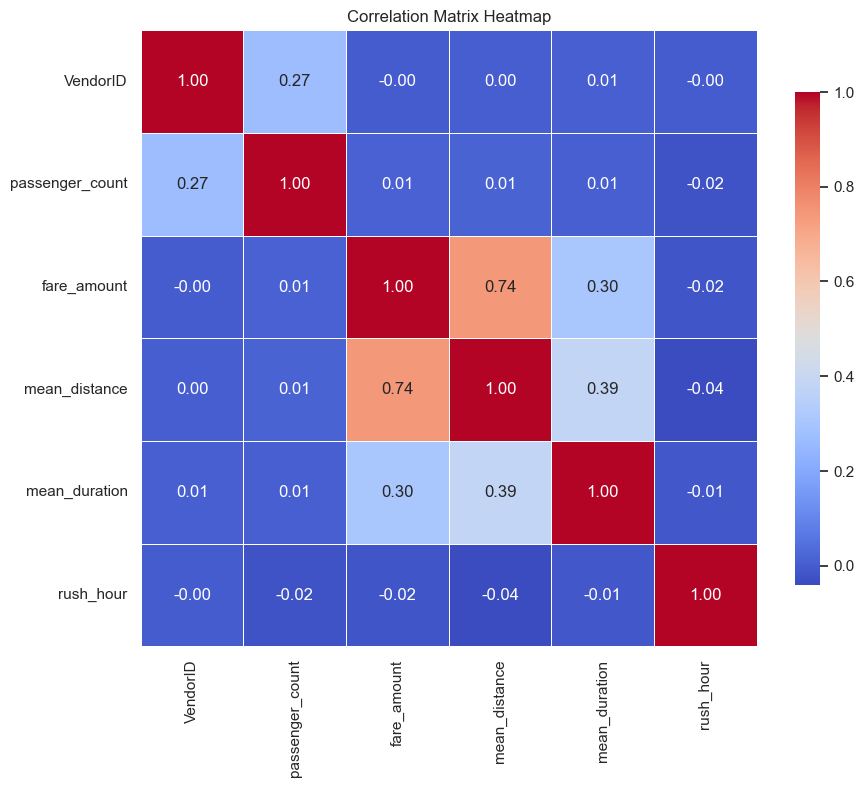

In [1049]:
## correlation heat map

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,            # Show correlation values
            fmt=".2f",             # Format numbers to 2 decimal places
            cmap="coolwarm",       # Color scheme
            square=True,           # Square cells
            linewidths=0.5,        # Line between cells
            cbar_kws={"shrink": .8})  # Colorbar size
plt.title('Correlation Matrix Heatmap')
plt.show()

In [1050]:
## from the heat map we can concuklde that mean duration and fareamout are correlated. we can still uses them 

In [1051]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


In [1052]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,23.000000,0
1,1,1,3.108889,24.333333,0
2,1,1,0.881429,7.257143,1
3,2,1,3.700000,31.000000,0
4,2,1,4.435000,14.500000,0


In [1053]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,23.000000,0,True
1,1,3.108889,24.333333,0,False
2,1,0.881429,7.257143,1,False
3,1,3.700000,31.000000,0,True
4,1,4.435000,14.500000,0,True


In [1054]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [1055]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.49880314 -0.03785561 -0.10015907 -0.65545204  0.89575785]
 [-0.49880314  0.45576354 -0.12965553  1.52566463  0.89575785]
 [ 0.28284738 -0.42923383  3.03051462 -0.65545204  0.89575785]
 ...
 [ 0.28284738 -0.51539736 -0.30417628  1.52566463  0.89575785]
 [ 0.28284738 -0.23198751  0.05186117 -0.65545204  0.89575785]
 [-0.49880314  1.82121141  0.22430203 -0.65545204  0.89575785]]


In [1056]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [1057]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)

print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)

print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7299387289323821
R^2: 0.7299387289323821
MAE: 2.609505352860898
MSE: 36.70049875144921
RMSE: 6.058093656543221


In [1058]:
X_test_scaled = scaler.transform(X_test)

In [1059]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.2496906269972492
R^2: 0.2496906269972492
MAE: 2.7493116269616458
MSE: 246.9837825427335
RMSE: 15.715717690984828


In [1060]:
#the results were beter in the training data

In [1061]:
# Create a `results` dataframe

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
9199,12.5,8.845462,3.654538
4955,6.0,8.661751,-2.661751
16833,12.0,8.496436,3.503564
13244,20.5,20.848996,-0.348996
1063,14.0,16.995076,-2.995076


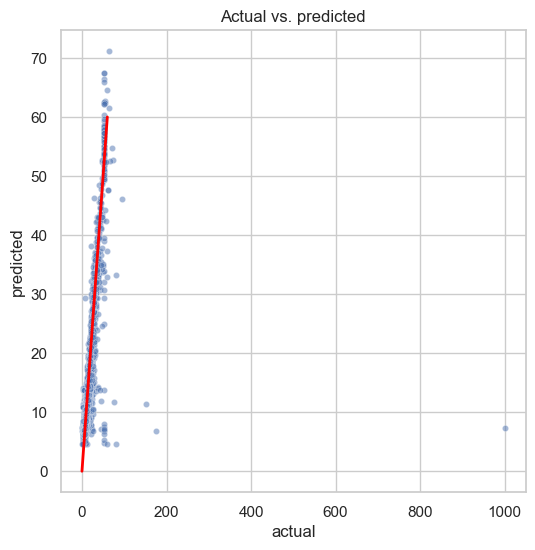

In [1062]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

0.19648209334537078

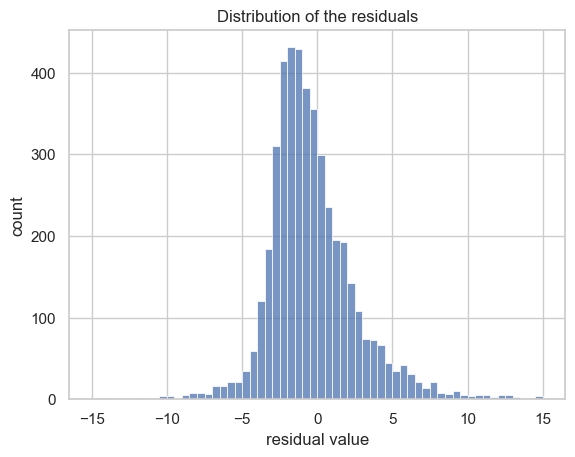

In [1063]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

results['residual'].mean()

## the distribution is normal with mean of 0.187.The residuals represent the variance in the outcome variable that is not
#explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

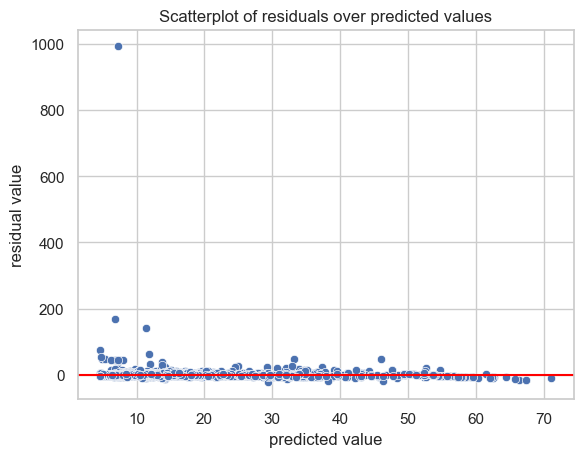

In [1064]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()


#The model's residuals are evenly distributed above and below zero

In [1065]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

#he coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. 

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.023374,9.854896,0.29033,0.216418,0.006791


In [1066]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

## from this we can conclude that for every 3.5 mile travelled the fare will increase by 9.9$.

3.59598874729009


In [1067]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [1068]:
# The data dictionary says that the RatecodeID column captures the following information:

# 1 = standard rate
# 2 = JFK (airport)
# 3 = Newark (airport)
# 4 = Nassau or Westchester
# 5 = Negotiated fare
# 6 = Group ride

# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [1069]:
## You will create a machine learning model for the TLC data. You will be responsible for leading these tasks, which include feature engineering,
##model development, and evaluation. 

In [1070]:
#building a random forest model to predict whether or not a rider will be a generous tipper 

## One problem is that doinf thisd model will allow taxi drives to pick their customes which is not ideal

In [1071]:
# The purpose of this model is to find ways to generate more revenue for taxi cab drivers.

# The goal of this model is to predict whether or not a customer is a generous tipper.

In [1072]:
Data2 = r'C:\Users\alikr\OneDrive\Desktop\Google certificate\Google advanced analytics\M1 Project\Automatidata project\nyc_preds_means.csv'

nyc_preds_means = pd.read_csv(Data2)

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [1073]:
## merge df and nyc_preds_means
df3 = pd.merge(df,nyc_preds_means, how = 'outer')

In [1074]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46057 entries, 0 to 46056
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             23416 non-null  float64        
 1   VendorID               23416 non-null  float64        
 2   tpep_pickup_datetime   23416 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  23416 non-null  datetime64[ns] 
 4   passenger_count        23416 non-null  float64        
 5   trip_distance          23416 non-null  float64        
 6   RatecodeID             23416 non-null  float64        
 7   store_and_fwd_flag     23416 non-null  object         
 8   PULocationID           23416 non-null  float64        
 9   DOLocationID           23416 non-null  float64        
 10  payment_type           23416 non-null  float64        
 11  fare_amount            23416 non-null  float64        
 12  extra                  23416 non-null  float64

In [1075]:
df3.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration,weekday,hour,rush_hour,predicted_fare
0,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060
1,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060
2,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659
3,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659
4,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659


In [1076]:
## we know from our EDA that custimer who opays cash have a tip amount of 0. we need to select the customer that only paid in card.

In [1077]:
df3_copy = df3.copy()

df1 = df3_copy[df3_copy['Type'] == 'Credit Card']

df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration,weekday,hour,rush_hour,predicted_fare
0,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060
1,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060
2,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659
3,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659
4,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,1.0,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659


In [1078]:
## Feature engineering

## lets Create a col called tip percentage

df1['tip_percent'] =  round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']),3)

## cretae a coolumn called generous if tip percentage > 20% then the customer is comsedered generous (target - Y)

df1['generous'] = df1['tip_percent'].apply(lambda x:1 if x >= 0.2  else 0)

C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\4056193473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] =  round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']),3)
C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\4056193473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent'].apply(lambda x:1 if x >= 0.2  else 0)


In [1082]:
## we need to crearted 4 columns: from column tpep_pickup_datetime 

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['time'] = df1['tpep_pickup_datetime'].dt.hour

# am_rush = [06:00–10:00)
# daytime = [10:00–16:00)
# pm_rush = [16:00–20:00)
# nighttime = [20:00–06:00)

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

df1['am_rush'] = df1['time'].apply(lambda x: 1 if 6 <= x < 10 else 0)
df1['daytime'] = df1['time'].apply(lambda x: 1 if 10 <= x < 16 else 0)
df1['pm_rush'] = df1['time'].apply(lambda x: 1 if 16 <= x < 20 else 0)
df1['night_time'] = df1['time'].apply(lambda x: 1 if (x >= 20 or x < 6) else 0)

C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\2774154411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\2774154411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\2774154411.py:5: Setting

In [1084]:
## Create a month column that has the the month that each passenger was puicked up
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

df1.head()

C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\2148416433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,Type,duration,pickoff_dropoff,mean_distance,mean_duration,weekday,hour,rush_hour,predicted_fare,tip_percent,generous,time,am_rush,daytime,pm_rush,night_time
0,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,January,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060,2.03,1,7,1,0,0,0
1,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,January,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.276060,2.03,1,7,1,0,0,0
2,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,January,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659,2.03,1,7,1,0,0,0
3,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,January,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659,2.03,1,7,1,0,0,0
4,3767951.0,1.0,2017-01-14 07:00:00,2017-01-14 07:00:00,1.0,0.0,1.0,N,208.0,208.0,1.0,2.5,0.0,0.5,6.7,0.0,0.3,10.0,January,14.0,0 days,Credit Card,0 days,208208,0.0,0.0,5.0,7.0,0.0,3.034659,2.03,1,7,1,0,0,0


In [1092]:
## Drop redundant and irrelevant variables

churn_df1 = df1.drop(['time', 'tip_percent', 'rush_hour', 'hour', 'weekday', 'Type','trip_duration','day', 'total_amount',
                     'improvement_surcharge','tolls_amount','tip_amount','mta_tax','extra','payment_type', 'pickoff_dropoff',
                     'store_and_fwd_flag','tpep_dropoff_datetime','tpep_pickup_datetime','Unnamed: 0','duration', 'trip_distance'], axis = 1)

In [1094]:

churn_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15519 entries, 0 to 46055
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15519 non-null  float64
 1   passenger_count  15519 non-null  float64
 2   RatecodeID       15519 non-null  float64
 3   PULocationID     15519 non-null  float64
 4   DOLocationID     15519 non-null  float64
 5   fare_amount      15519 non-null  float64
 6   month            15519 non-null  object 
 7   mean_distance    15519 non-null  float64
 8   mean_duration    15519 non-null  float64
 9   predicted_fare   298 non-null    float64
 10  generous         15519 non-null  int64  
 11  am_rush          15519 non-null  int64  
 12  daytime          15519 non-null  int64  
 13  pm_rush          15519 non-null  int64  
 14  night_time       15519 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 1.9+ MB


In [1096]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('str')
C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('str')
C:\Users\alikr\AppData\Local\Temp\ipykernel_19380\664194328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [1178]:
churn_df1 = pd.get_dummies(churn_df1, drop_first=True)
churn_df1 = churn_df1.fillna(0).astype(int)
churn_df1.info()
churn_df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15519 entries, 0 to 46055
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   VendorID         15519 non-null  int32
 1   passenger_count  15519 non-null  int32
 2   RatecodeID       15519 non-null  int32
 3   PULocationID     15519 non-null  int32
 4   DOLocationID     15519 non-null  int32
 5   fare_amount      15519 non-null  int32
 6   mean_distance    15519 non-null  int32
 7   mean_duration    15519 non-null  int32
 8   predicted_fare   15519 non-null  int32
 9   generous         15519 non-null  int32
 10  am_rush          15519 non-null  int32
 11  daytime          15519 non-null  int32
 12  pm_rush          15519 non-null  int32
 13  night_time       15519 non-null  int32
 14  month_August     15519 non-null  int32
 15  month_December   15519 non-null  int32
 16  month_February   15519 non-null  int32
 17  month_January    15519 non-null  int32
 18  month_July 

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,fare_amount,mean_distance,mean_duration,predicted_fare,generous,am_rush,daytime,pm_rush,night_time,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1,1,1,208,208,2,0,0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,1,208,208,2,0,0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,208,208,2,0,0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,1,208,208,2,0,0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,1,208,208,2,0,0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1102]:
churn_df1['generous'].value_counts()

## we conclude that we have 7K are not generous and 8k geneorus --> 52%  are not generous and 47% are generous

generous
1    8141
0    7378
Name: count, dtype: int64

In [1108]:
## isolate y and x variables and split train and test sets

y = churn_df1['generous']

X = churn_df1.copy()

X = X.drop('generous', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [1110]:
## RANDOM FOREST 
rf = RandomForestClassifier(random_state=0)

In [1114]:
# GridSearchCV 

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [1116]:
rf_val = rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')
rf_val.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [1118]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 100}

In [1120]:
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=0)

In [1128]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


rf_cv_results = make_results('Random Forest CV', rf_val, metric = 'f1')
rf_cv_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.695258,0.823452,0.753941,0.718018


In [1144]:
y_pred = rf_val.predict(X_test)

In [1146]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [1148]:
rf_test_scores = get_test_scores('RF test', y_pred, y_test)
results = pd.concat([rf_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.695258,0.823452,0.753941,0.718018
0,RF test,0.697800,0.826044,0.756526,0.721134


In [1150]:
## XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 



cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}



xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')


In [1152]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [1154]:
## prediction on test data
xgb_cv_preds = xgb_cv.predict(X_test)

print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score final XGB model:  0.75696316262354
Recall score final XGB model:  0.828009828009828
Precision score final XGB model:  0.6971452213487794
Accuracy score final XGB model:  0.7211340206185567


In [1170]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


xgb_cv_results = make_results('XGB CV',xgb_cv, metric = 'f1')
xgb_cv_results

,model,precision,recall,F1,accuracy
0,XGB CV,0.69291,0.828038,0.754449,0.717245


In [1172]:
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.695258,0.823452,0.753941,0.718018
0,RF test,0.697800,0.826044,0.756526,0.721134
0,XGB test,0.697145,0.828010,0.756963,0.721134
0,XGB test,0.697145,0.828010,0.756963,0.721134
0,XGB test,0.697145,0.828010,0.756963,0.721134


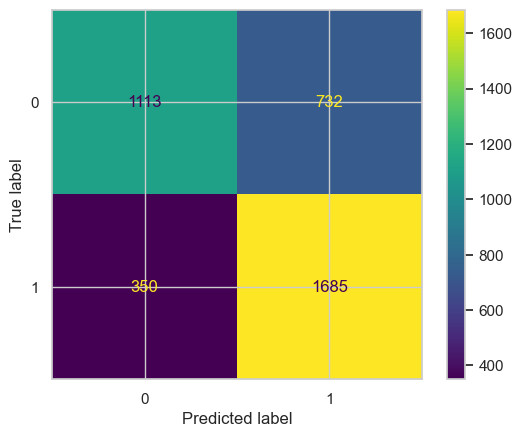

In [1174]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()


conf_matrix_plot(xgb_cv, X_test, y_test)

## we can see that the common type if error is type 1 error -> the model predicted they will not tip but they did 


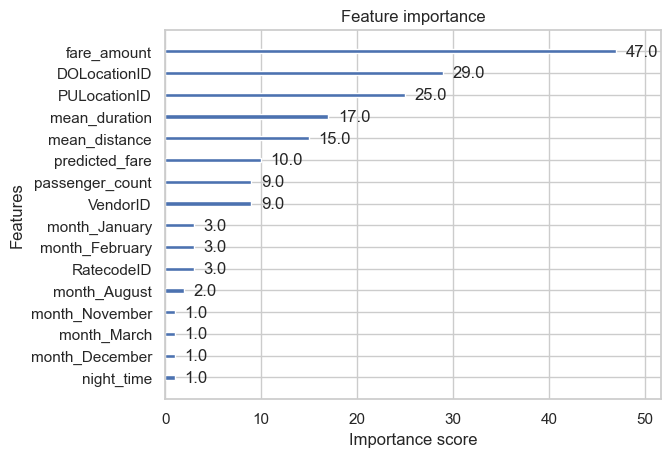

In [1176]:
plot_importance(xgb_cv.best_estimator_);

## the mosdt important estimator is Dropodd Fare_amount

In [ ]:
## conclusion:

## 1 - Yes, this is model performs acceptably. Its F1 score was 0.7235 and it had an overall accuracy of 0.6865. It correctly identified ~78% 
## of the actual responders in the test set, which is 48% better than a random guess.